In [124]:
import os
import pandas as pd

def get_csv_filenames_with_min_rows(directory, min_rows,max_rows):
    csv_files = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            try:
                # Read the CSV file with pandas
                df = pd.read_csv(file_path)
                # Check if the number of rows is greater than or equal to the minimum specified
                if (len(df) >= min_rows) and (len(df)<=max_rows):
                    csv_files.append(filename)
            except Exception as e:
                print(f"Error reading file {filename}: {e}")
    return csv_files

# Directory containing CSV files
directory_path = 'animation-songwen-final'
# Minimum number of rows required
min_rows = 194
max_rows = 1000
csv_files_with_min_rows = get_csv_filenames_with_min_rows(directory_path, min_rows,max_rows)
print("CSV files with 194 or more rows:")
print(len(csv_files_with_min_rows))
# for csv in csv_files_with_min_rows:
#     print(csv)


CSV files with 194 or more rows:
184


In [145]:
success_list=[]
time_list=[]
bot_list=[]
cbot_list=[]
for csv in csv_files_with_min_rows:
	temp=pd.read_csv('animation-songwen-final/'+csv)
	newtemp=temp[temp['trial_type']=='survey-text']
	success_list.append(list(newtemp['response'])[0])
	time_list.append(temp.iloc[-1]['time_elapsed'])
	if temp.iloc[-1]['time_elapsed']<550*1000:
		bot_list.append(list(newtemp['response'])[0][7:-2])
		cbot_list.append(csv)
len(list(set(success_list)))
cbot_list

['741.csv', '781.csv', '686.csv', '721.csv']

(array([1., 0., 0., 1., 2., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
        1., 2., 0., 0., 0., 0., 1., 0., 1., 3., 3., 2., 1., 6., 1., 0., 4.,
        2., 2., 5., 4., 4., 2., 1., 4., 1., 4., 6., 2., 0., 2., 0., 5.]),
 array([481.192  , 491.28232, 501.37264, 511.46296, 521.55328, 531.6436 ,
        541.73392, 551.82424, 561.91456, 572.00488, 582.0952 , 592.18552,
        602.27584, 612.36616, 622.45648, 632.5468 , 642.63712, 652.72744,
        662.81776, 672.90808, 682.9984 , 693.08872, 703.17904, 713.26936,
        723.35968, 733.45   , 743.54032, 753.63064, 763.72096, 773.81128,
        783.9016 , 793.99192, 804.08224, 814.17256, 824.26288, 834.3532 ,
        844.44352, 854.53384, 864.62416, 874.71448, 884.8048 , 894.89512,
        904.98544, 915.07576, 925.16608, 935.2564 , 945.34672, 955.43704,
        965.52736, 975.61768, 985.708  ]),
 <BarContainer object of 50 artists>)

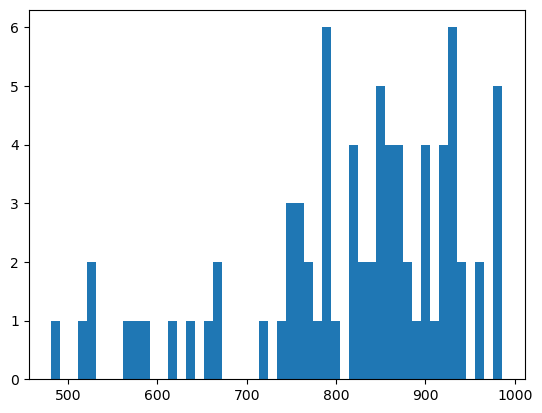

In [126]:
from matplotlib import pyplot as plt
import numpy as np
plt.hist(np.array(time_list)*0.001,bins=50)

305.csv: 5f4520ebb012170878012efc # this person try again
390.csv: 6032a88a2b8e882a37cc2766 # this person not

In [127]:
print('{"Q0":"5f4520ebb012170878012efc"}' in success_list)
print('{"Q0":"6032a88a2b8e882a37cc2766"}' in success_list)


True
False


In [128]:
success_list.append('{"Q0":"6032a88a2b8e882a37cc2766"}')

In [129]:
merge_data=pd.read_csv('animation-songwen-final.csv')
merge_data.head(5)

,rt,stimulus,response,trial_type,trial_index,time_elapsed,internal_node_id,run_id,condition,recorded_at,...,item_height_mm,item_width_px,px2mm,scale_factor,correct,question_order,init_locations,moves,final_locations,accuracy
0,7553.0,"<p>Due to compatibility issues, please <b>do n...",0,html-button-response,0,7563,0.0-0.0,155,1,2024-02-29 04:45:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,browser-check,1,8554,0.0-1.0,155,1,2024-02-29 04:45:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,browser-check,2,19370,0.0-2.0,155,1,2024-02-29 04:45:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16327.0,"<p>Due to compatibility issues, please <b>do n...",0,html-button-response,0,16336,0.0-0.0,120,1,2024-02-29 04:45:16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,browser-check,1,17321,0.0-1.0,120,1,2024-02-29 04:45:16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
prolific=merge_data[merge_data['trial_type']=='survey-text']
prolific.head()

,rt,stimulus,response,trial_type,trial_index,time_elapsed,internal_node_id,run_id,condition,recorded_at,...,item_height_mm,item_width_px,px2mm,scale_factor,correct,question_order,init_locations,moves,final_locations,accuracy
378,5891.0,NaN,"{""Q0"":""59b94b6211212f0001cd118a""}",survey-text,6,35396,0.0-6.0,110,1,2024-02-29 04:45:03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,10447.0,NaN,"{""Q0"":""614f70b55373b6760cb9d5c9""}",survey-text,6,161485,0.0-6.0,100,1,2024-02-29 04:44:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,7302.0,NaN,"{""Q0"":""613b45335ef9d60c2f15bb86""}",survey-text,6,172985,0.0-6.0,104,1,2024-02-29 04:44:48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,8436.0,NaN,"{""Q0"":""65ab04a12a188d698a4df098""}",survey-text,6,87433,0.0-6.0,103,1,2024-02-29 04:44:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,36437.0,NaN,"{""Q0"":""650c46a95d672d7602328705""}",survey-text,6,76385,0.0-6.0,11,1,2024-02-29 02:28:17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
len(prolific.response.tolist())

202

In [132]:
all_people=list(set(prolific.response.tolist()))
print(len(all_people))
fail_list=[]
for people in all_people:
    if people not in success_list:
        print(people)

189
{"Q0":"5a520774eedc3200014206b4"}
{"Q0":"65257c1a7780ceee7f6ef9bd"}
{"Q0":"60fd125837662fc5b446b2b8"}
{"Q0":"65959b14d677879036710db0"}
{"Q0":"59b94b6211212f0001cd118a"}


Among 189 collected runs, 183 of them are valid. 1 of them are almost valid, missing the ranking and demographics.

6032a88a2b8e882a37cc2766 finish almost everything. Let's fund this person.

The following 5 ID didn't finish:
65257c1a7780ceee7f6ef9bd;
59b94b6211212f0001cd118a;
5a520774eedc3200014206b4;
65959b14d677879036710db0;
60fd125837662fc5b446b2b8;

In [133]:
longify={'b':'Blue','p':'Purple','g':'Green','y':'Yellow'}

In [158]:
from tqdm import tqdm
import re
import json
from collections import defaultdict
avg_dict=defaultdict(int)
var_dict=defaultdict(int)
spk_dict=defaultdict(int)
for csv in tqdm(csv_files_with_min_rows):
	temp=pd.read_csv('animation-songwen-final/'+csv)
	if temp[temp['trial_type']=='survey-text']['response'].tolist()[0] in success_list:
		response=temp[temp['trial_type'] =='survey-multi-choice'] 
		question=temp[temp['trial_type']=='video-button-response']
		# is_first=True
		# first_index=35
		rsp_i=0
		for index, row in question.iterrows():
			# if is_first: 
			# 	first_index=index
			# 	is_first=False
			# 	continue #skip the warm up
			visname=row['stimulus'][2:-2]
			dirname=re.sub(r'_(\d+)_', r'\1', visname.split('AVG',1)[0])
			path= '../manim/' + dirname +'/videos/480p60/sections/Plot.json'
			with open (path, 'r') as f:
				answer_sheet=json.load(f)
			for ans in answer_sheet:
				if (ans['name']==visname):
					answer=ans['type']
					break
			#average
			avg_dict[dirname]+= int(re.findall(r'>(.*?)<\/font>',response.iloc[rsp_i*3]['response'])[0]==longify[answer[0]])
			# print(index-first_index-5)
			#variance
			var_dict[dirname]+= int(response.iloc[rsp_i*3+1]['response']==longify[answer[1]])
			# #spike
			spk_dict[dirname]+= int(response.iloc[rsp_i*3+2]['response']==longify[answer[2]])
		rsp_i+=1


100%|██████████| 184/184 [00:03<00:00, 50.19it/s]


In [160]:
avg_dict

defaultdict(int,
            {'seq_trace_his4': 213,
             'seq_trace_nohis4': 119,
             'sync_trace2': 29,
             'static3': 66,
             'seq_notrace_nohis3': 70,
             'sync_notrace4': 133,
             'static4': 150,
             'seq_notrace_nohis2': 25,
             'sync_notrace3': 80,
             'seq_notrace_his4': 152,
             'sync_notrace2': 37,
             'seq_notrace_nohis4': 142,
             'seq_trace_nohis3': 67,
             'seq_trace_his3': 68,
             'seq_trace_nohis2': 25,
             'sync_trace3': 88,
             'seq_notrace_his2': 34,
             'seq_notrace_his3': 77,
             'static2': 34,
             'sync_trace4': 137,
             'seq_trace_his2': 25})